# *Base de dados* #

## *Importando dados de arquivos csv* ##

In [350]:

import pandas as pd

caminho = "tabela_clubes.csv"

df = pd.read_csv(caminho)

display(df)

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008,18,Santo Andre,11,8,19,46:61,-15,43,"25,1",3,6230000,145000,NaN,NaN,NaN,NaN
196,2008,12,Santos,12,13,13,58:58,0,33,"23,9",1,27850000,844000,NaN,NaN,NaN,NaN
197,2008,3,Sao Paulo,18,11,9,57:42,15,30,"23,9",1,46650000,1560000,NaN,NaN,NaN,NaN
198,2008,20,Sport,7,10,21,48:71,-23,30,25,1,15600000,520000,NaN,NaN,NaN,NaN


# Base de dados financeiros #

In [351]:
df_receita = pd.read_csv("receitas_do_futebol.csv")
display(df_receita)

,tipo,receita
0,Direitos de Tv e Premiações,3.000
1,Transferências de Atletas,1.400
2,Marketing,1.200
3,Bilheteria,0.599
4,Socio torcedor,0.505
5,Outras,0.360
6,Clube social,0.335


In [352]:
df_valor_time = pd.read_csv("valor_time.csv")
display(df_valor_time)

,Clube,Valor_2023,Valor_2024,%
0,palmeiras,159.95,220.25,37.7
1,flamengo,161.40,164.50,1.9
2,corinthians,88.15,113.80,29.1
3,fluminense,77.30,100.05,42.4
4,internacional,73.95,100.20,35.5
5,sao paulo,100.55,91.05,-9.4
6,atletico mineiro,84.90,88.70,4.5
7,gremio,58.70,77.50,32.0
8,bragantino,73.43,72.40,-1.4
9,botafogo,68.65,71.00,3.4


In [353]:
df_jogador= pd.read_csv("Valor_Jogador.csv")
df.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN


In [354]:
df_receita = pd.read_csv('receitas_do_futebol.csv')
display(df_receita)

,tipo,receita
0,Direitos de Tv e Premiações,3.000
1,Transferências de Atletas,1.400
2,Marketing,1.200
3,Bilheteria,0.599
4,Socio torcedor,0.505
5,Outras,0.360
6,Clube social,0.335


# *Base dados da torcida* #

In [355]:
df_torcida = pd.read_csv('Torcida.csv')
df_torcida.head()


,Clube,Número de Torcedores (milhões),Percentual (%)
0,Flamengo,46.9,21.9
1,Corinthians,30.4,14.2
2,São Paulo,21.2,9.9
3,Palmeiras,16.5,7.7
4,Vasco,13.2,6.2


# *Tratamento de dados* #

### Eliminando colunas vazias ###

In [356]:
colunas = ['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16']
df.drop(columns=colunas)
df.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN


### Reduzindo linhas para aproveitar melhor os dados ###

In [357]:

df = df[~df['Clubes'].isin(['Guarani', 'Nautico','Joinville', 'Prudente', 'Portuguesa', 'Santo Andre', 'Criciuma', 'Avai', "Coritiba", 'Figueirense' ])]


## *Importação de bibliotecas para visualização dos dados* ##

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Definindo cores para time do futebol ##

In [359]:
team_colors = {
    "Palmeiras": "#004D40",  # Verde Escuro
    "Flamengo": "#B71C1C",  # Vermelho Escuro
    "Corinthians": "#0D1321",  # Preto
    "Sao Paulo": "#D32F2F",  # Vermelho
    "Santos": "dimgray",  # Cinza escuro
    "Gremio": "blue",  # Azul
    "Vasco": "grey",  # Cinza
    "Botafogo": "#000000",  # Preto
    "Atletico-MG": "#FDD017",  # Amarelo
    "Cruzeiro": "#0033A0",  # Azul Escuro
}

# Gráficos de Boxplot #

### *Descrição dos dados utilizados* ###

In [360]:
df['Saldo'].describe()

count    170.000000
mean       2.229412
std       14.627536
min      -39.000000
25%       -7.000000
50%        0.500000
75%       12.750000
max       40.000000
Name: Saldo, dtype: float64

In [361]:
df[['Vitorias', 'Empates', 'Derrotas']].describe()

,Vitorias,Empates,Derrotas
count,170.000000,170.000000,170.000000
mean,14.400000,13.300000,10.288235
std,3.901752,4.035127,2.556899
min,4.000000,4.000000,3.000000
25%,11.000000,11.000000,9.000000
50%,14.000000,13.000000,10.000000
75%,17.000000,16.000000,12.000000
max,24.000000,24.000000,17.000000


In [362]:
df['Idade_Media'].describe()

count      170
unique      40
top       23,5
freq        13
Name: Idade_Media, dtype: object

### *Filtrando os dados para análise* ###

In [363]:
clubes_mostrados = ['Palmeiras', 'Flamengo', 'Corinthians',
                     'Sao Paulo', 'Santos', 'Gremio', 'Vasco', 
                     'Botafogo', 'Atletico-MG', 'Cruzeiro']
df_filtrado = df[df['Clubes'].isin(clubes_mostrados)]

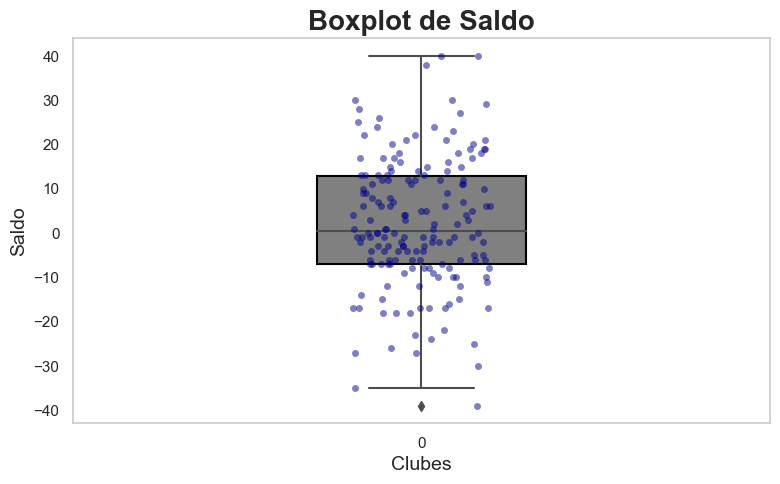

In [364]:
# Criar boxplot para 'Saldo'
plt.figure(figsize = (9,5))
sns.boxplot(data = df['Saldo'], width = 0.3, color = 'grey', boxprops=dict(edgecolor='black'))
sns.stripplot(data=  df['Saldo'], color = 'darkblue', alpha = 0.5)

plt.xlabel('Clubes', fontsize = 14)
plt.ylabel('Saldo', fontsize = 14)
plt.title('Boxplot de Saldo', fontsize = 20,fontweight = 'bold')
plt.grid(False)
plt.show()


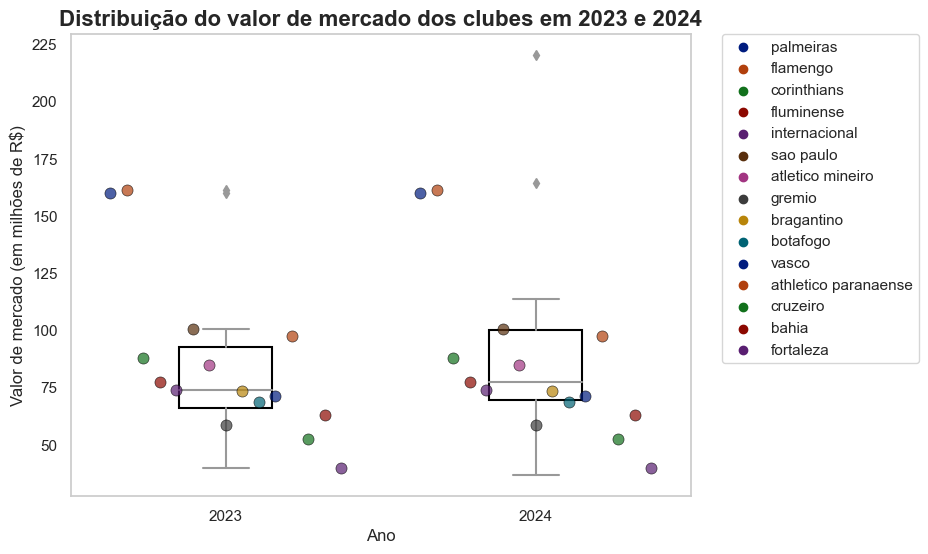

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_valor_time['Ano'] = '2023'
df_valor_time_2024 = df_valor_time.copy()
df_valor_time_2024['Ano'] = '2024'
df_combined = pd.concat([df_valor_time[['Clube', 'Valor_2023', 'Ano']],
                          df_valor_time_2024[['Clube', 'Valor_2024', 'Ano']]])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='Ano', y='Valor_2023', color='white', 
            width=0.3, boxprops=dict(edgecolor='black'))
sns.boxplot(data=df_combined, x='Ano', y='Valor_2024', color='white', 
            width=0.3, boxprops=dict(edgecolor='black'))
sns.stripplot(data=df_combined, x='Ano', y='Valor_2023', hue='Clube', 
jitter=True, dodge=True, linewidth=0.5, edgecolor='black', alpha=0.7, size=8, palette = 'dark')

plt.ylabel('Valor de mercado (em milhões de R$)')
plt.title('Distribuição do valor de mercado dos clubes em 2023 e 2024',
 fontsize = 16, fontweight = 'bold')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#### *Filtrando dados* #### 

In [365]:
clubes_mostrados = ['Palmeiras', 'Flamengo', 'Corinthians',
                     'Sao Paulo', 'Santos', 'Gremio', 'Vasco', 
                     'Botafogo', 'Atletico-MG', 'Cruzeiro']
df_filtrado = df[df['Clubes'].isin(clubes_mostrados)]

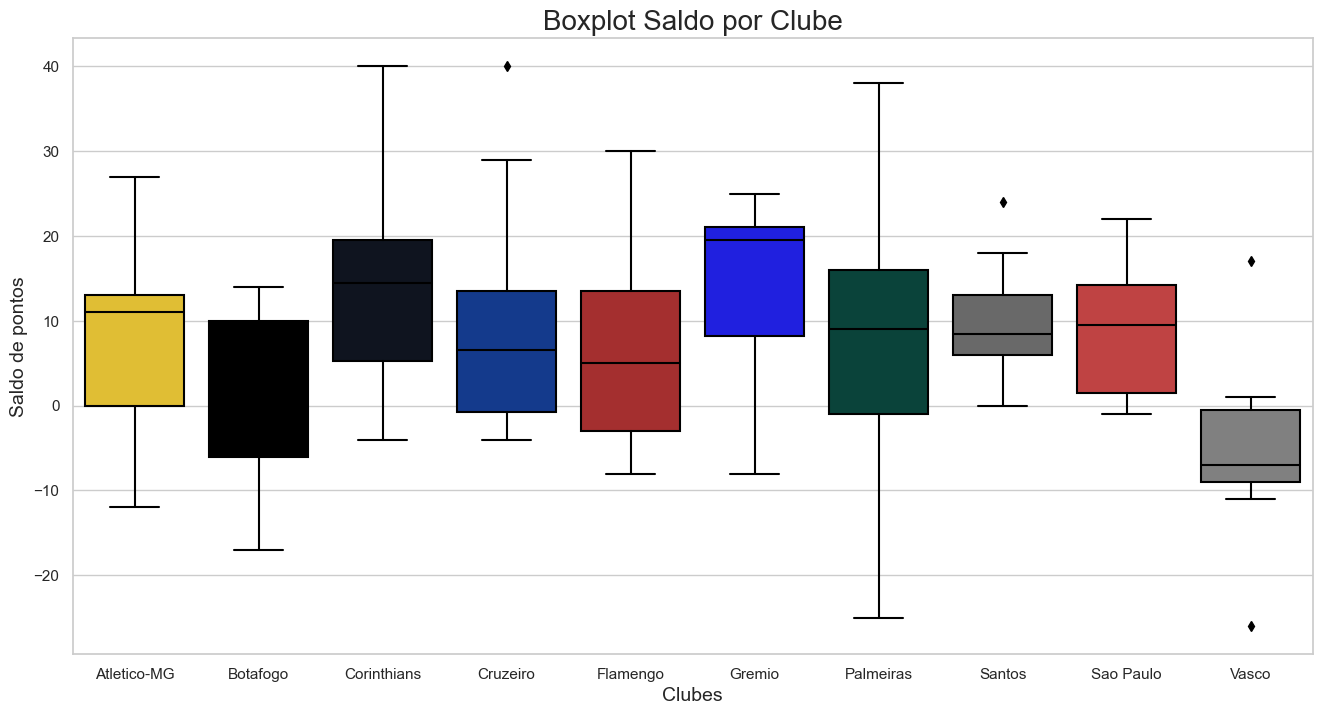

In [366]:
plt.figure(figsize=(16,8))

sns.boxplot(x= 'Clubes', y = 'Saldo', data=df_filtrado, palette = team_colors)


plt.title('Boxplot Saldo por Clube', fontsize = 20)
plt.xlabel("Clubes", fontsize = 14)
plt.ylabel("Saldo de pontos", fontsize = 14)
plt.show()

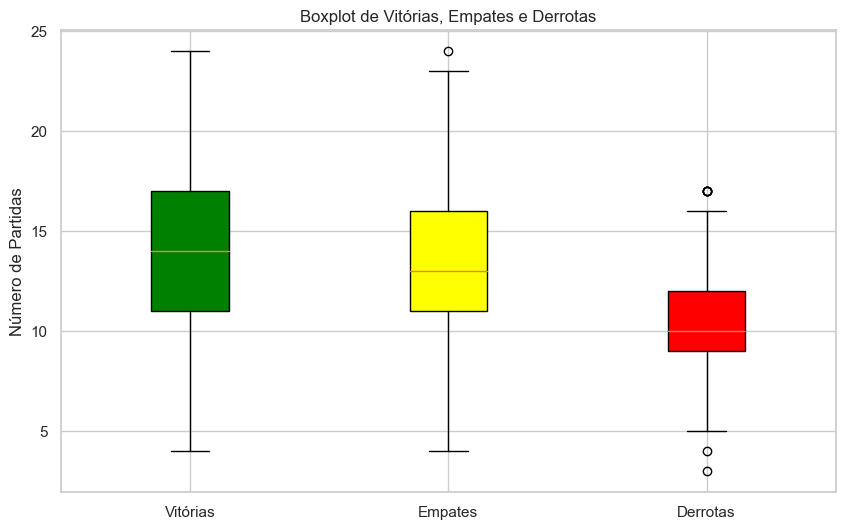

In [367]:

plt.figure(figsize=(10, 6))

box = plt.boxplot([df['Vitorias'], df['Empates'], df['Derrotas']], patch_artist=True, positions=[1, 2, 3])

colors = ['green', 'yellow', 'red']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Boxplot de Vitórias, Empates e Derrotas')
plt.ylabel('Número de Partidas')
plt.xticks([1, 2, 3], ['Vitórias', 'Empates', 'Derrotas'])

plt.show()


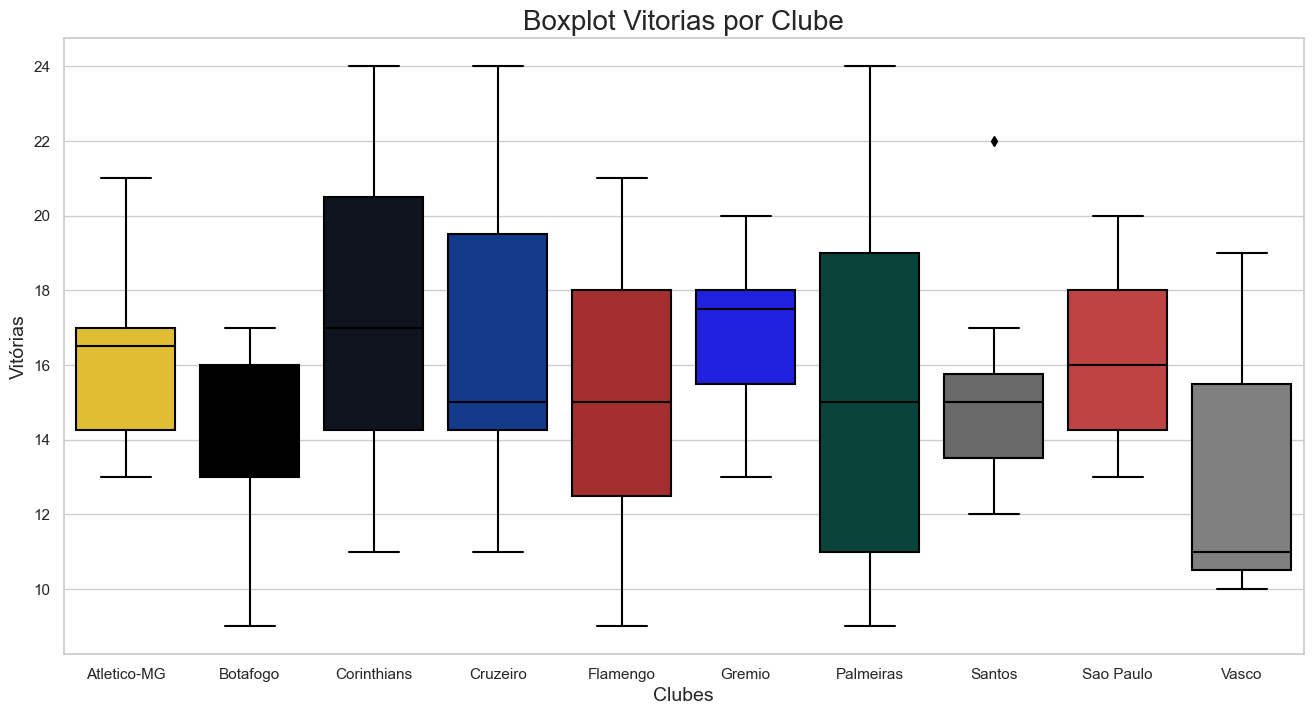

In [368]:
plt.figure(figsize=(16,8))

sns.boxplot(x= 'Clubes', y = 'Vitorias', data=df_filtrado, palette = team_colors)

plt.title('Boxplot Vitorias por Clube', fontsize = 20)
plt.xlabel("Clubes", fontsize = 14)
plt.ylabel("Vitórias", fontsize = 14)
plt.show()

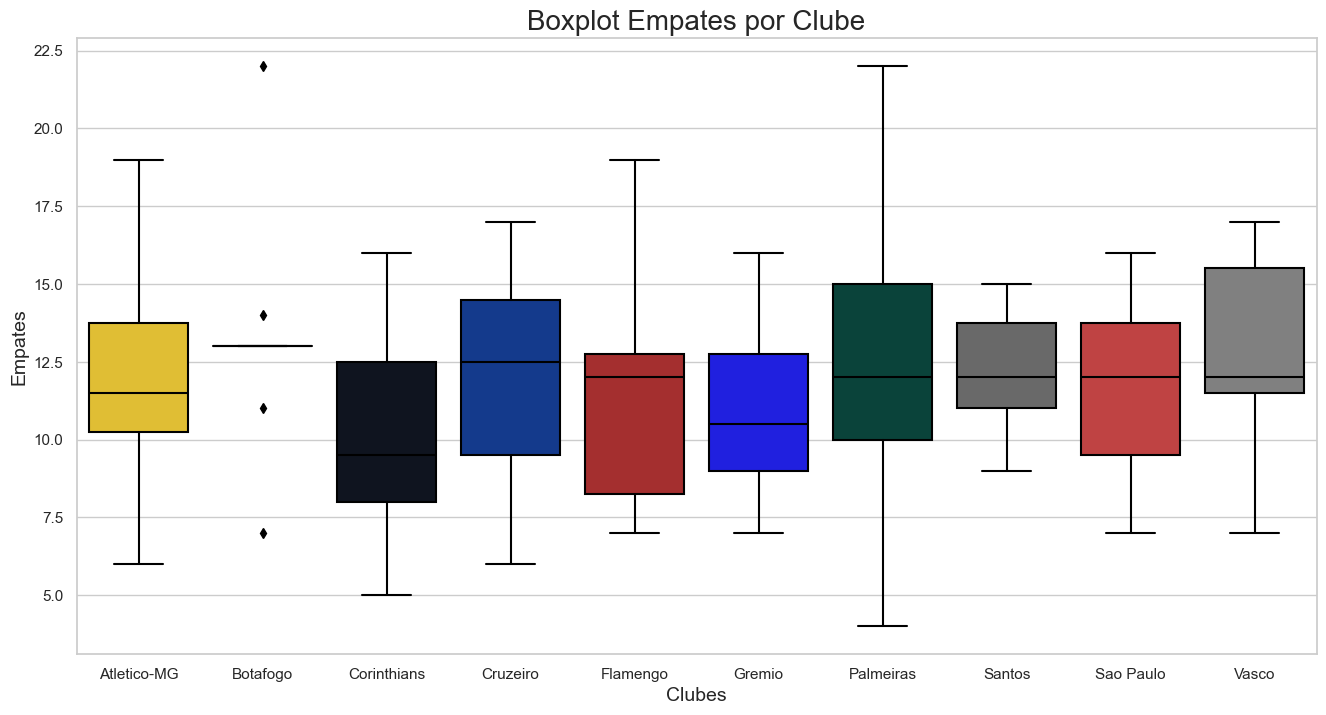

In [369]:
plt.figure(figsize=(16,8))

sns.boxplot(x= 'Clubes', y = 'Empates', data=df_filtrado, palette = team_colors)

plt.title('Boxplot Empates por Clube', fontsize = 20)
plt.xlabel("Clubes", fontsize = 14)
plt.ylabel("Empates", fontsize = 14)

plt.show()

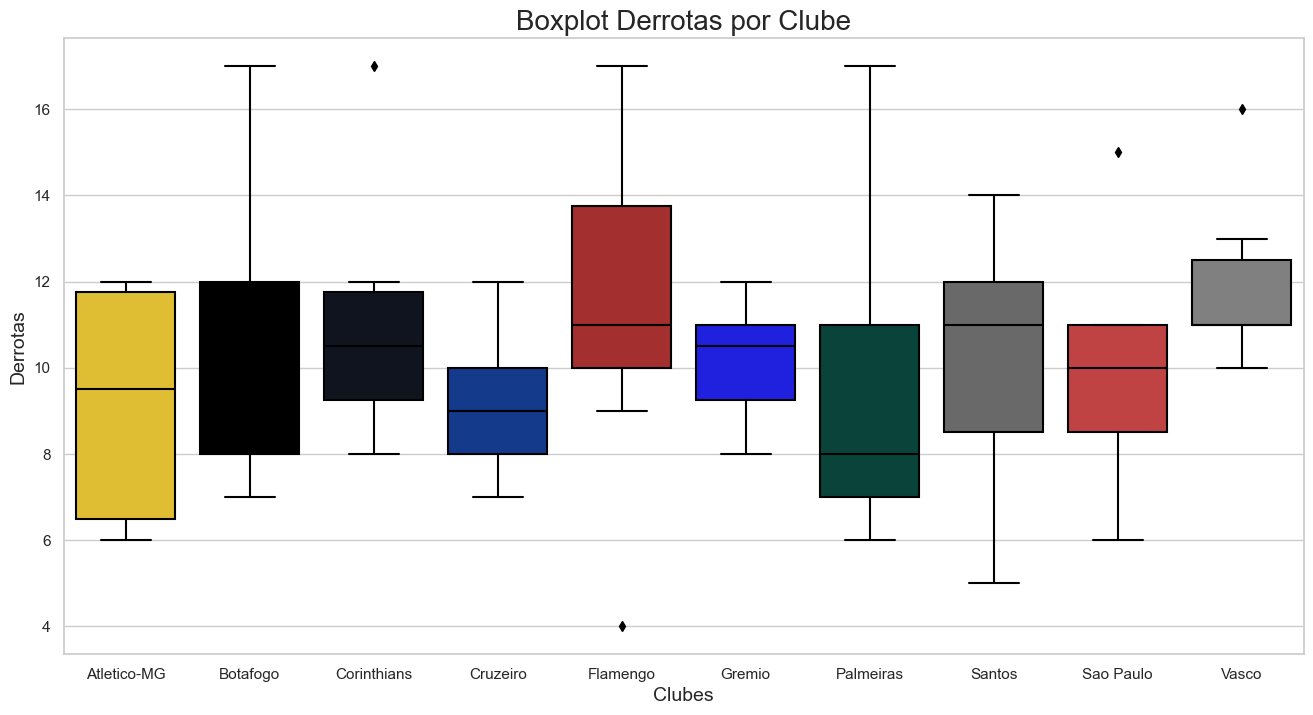

In [370]:
plt.figure(figsize=(16,8))

sns.boxplot(x= 'Clubes', y = 'Derrotas', data=df_filtrado, palette = team_colors)

plt.title('Boxplot Derrotas por Clube', fontsize = 20)
plt.xlabel("Clubes", fontsize = 14)
plt.ylabel("Derrotas", fontsize = 14)
plt.show()

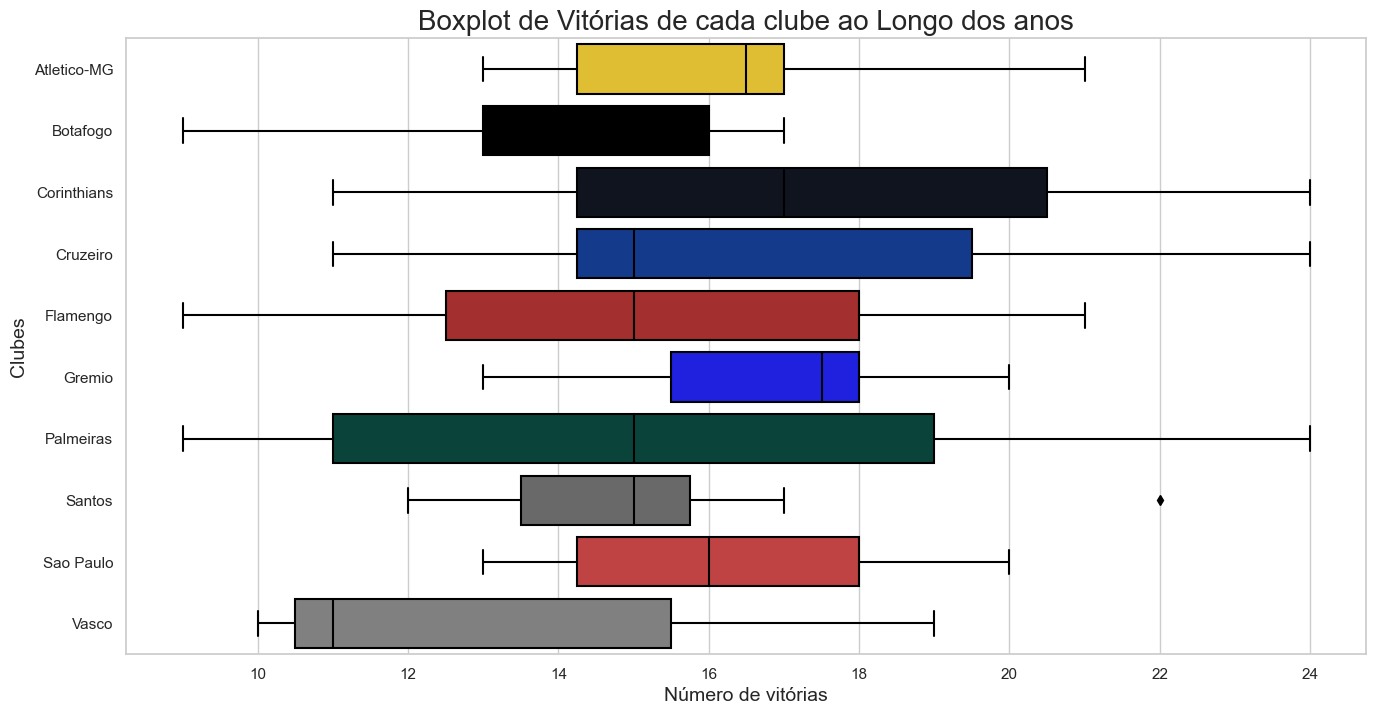

In [371]:
plt.figure(figsize=(16, 8))

sns.boxplot(y = "Clubes", x = "Vitorias", data = df_filtrado, orient = 'h', palette = team_colors)

plt.title('Boxplot de Vitórias de cada clube ao Longo dos anos', fontsize = 20)
plt.xlabel('Número de vitórias', fontsize = 14)
plt.ylabel('Clubes', fontsize = 14)

plt.show()

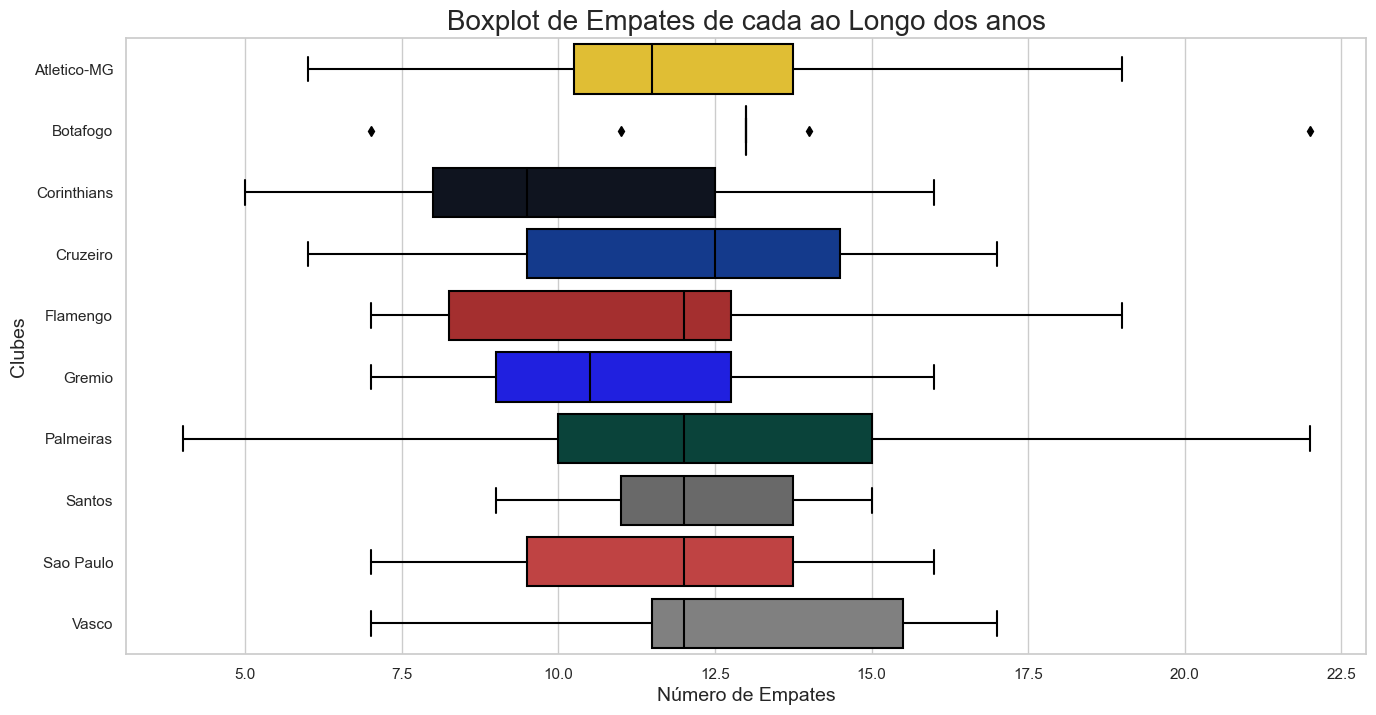

In [372]:
plt.figure(figsize=(16, 8))

sns.boxplot(y = "Clubes", x = "Empates", data = df_filtrado, orient = 'h', palette = team_colors)

plt.title('Boxplot de Empates de cada ao Longo dos anos', fontsize = 20)
plt.xlabel('Número de Empates', fontsize = 14)
plt.ylabel('Clubes', fontsize = 14)

plt.show()

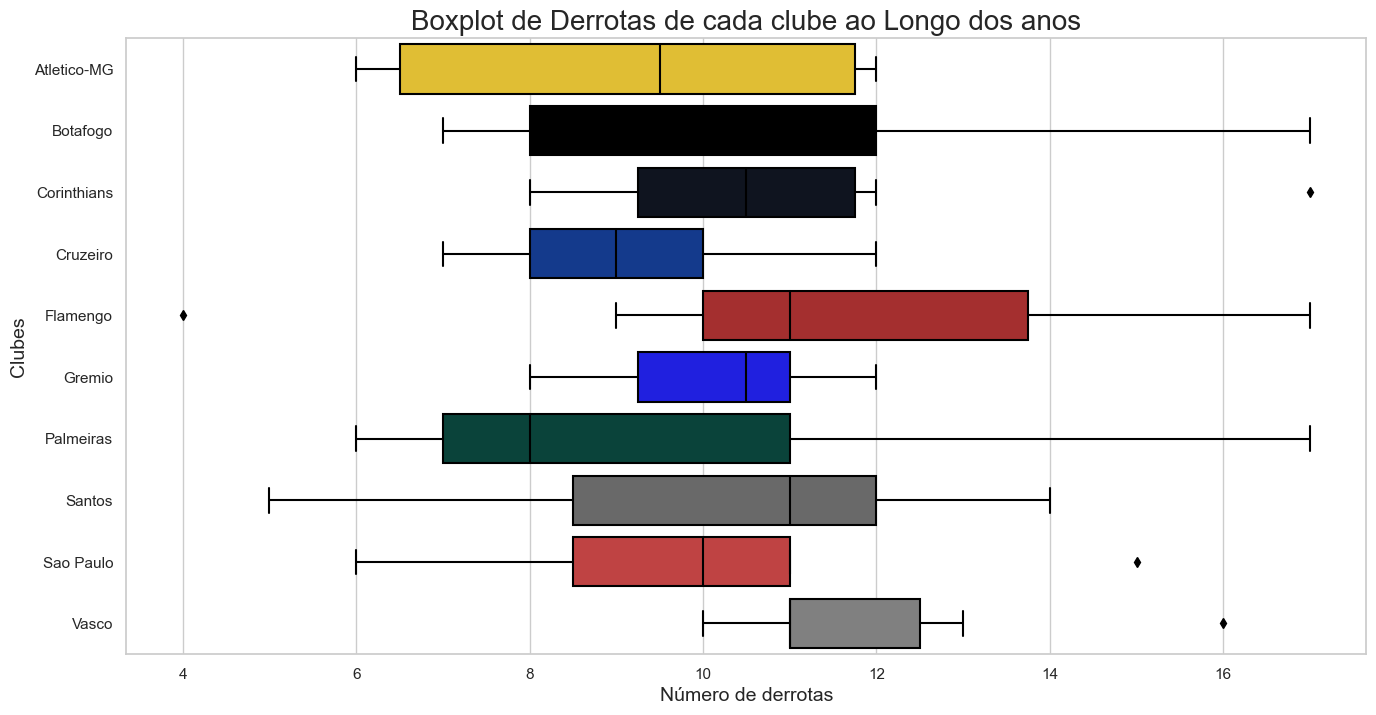

In [373]:
plt.figure(figsize=(16, 8))

sns.boxplot(y = "Clubes", x = "Derrotas", data = df_filtrado, orient = 'h', palette = team_colors)

plt.title('Boxplot de Derrotas de cada clube ao Longo dos anos', fontsize = 20)
plt.xlabel('Número de derrotas', fontsize = 14)
plt.ylabel('Clubes', fontsize = 14)

plt.show()

# *Mudanca de posições ao longo do tempo* # 

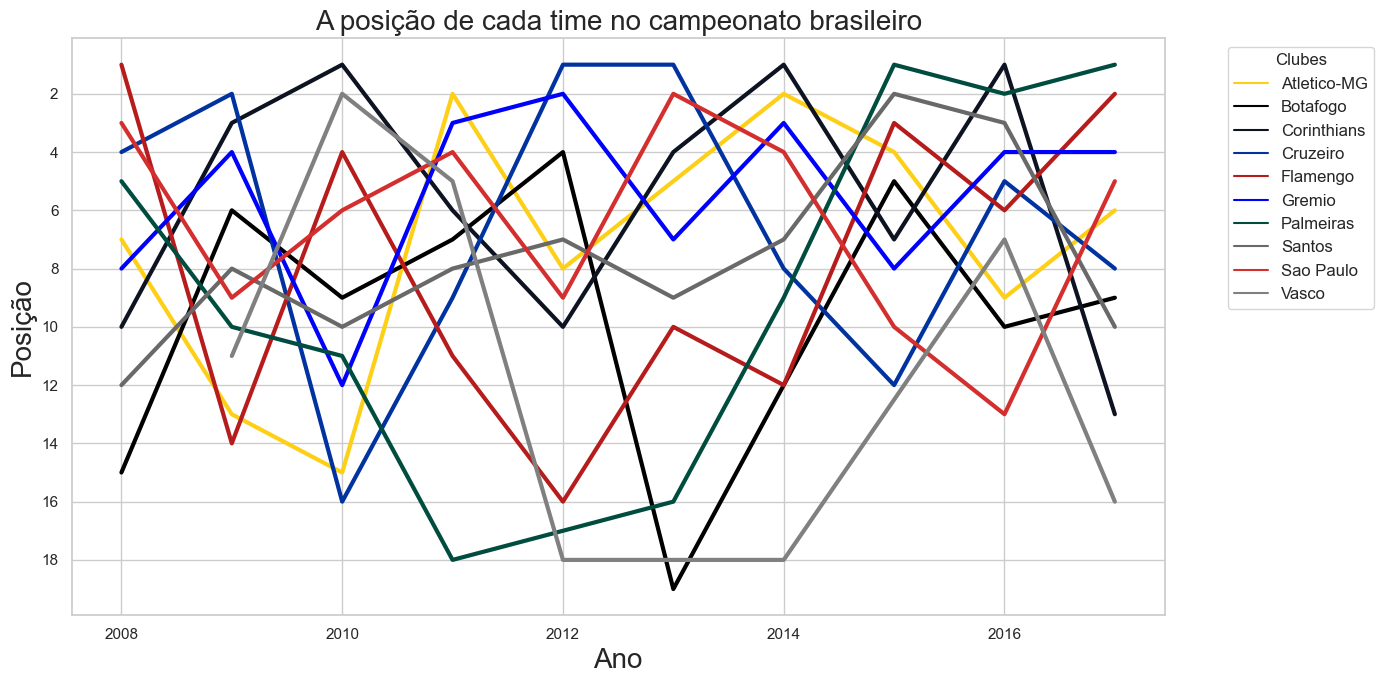

In [374]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(14,7))
sns.lineplot(data = df_filtrado, x = "Ano", y = "Pos.", 
             hue = "Clubes",palette = team_colors, linewidth = 3)

plt.title("A posição de cada time no campeonato brasileiro",fontsize = 20)
plt.xlabel("Ano",fontsize = 20)
plt.ylabel("Posição",fontsize = 20)
plt.gca().invert_yaxis()
plt.grid(True)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend(title="Clubes", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

plt.tight_layout()

plt.show()
    

In [375]:
fig = px.line(df_filtrado, x='Ano', y ='Saldo', color= 'Clubes', color_discrete_map = team_colors)
fig.update_layout(title ="Clubes e seu saldo de pontos ao longo dos anos",
                   title_x = 0.5, title_font=dict(size=24),
                   width=800, height=600)
fig.show()

# Gráficos de histogramas #

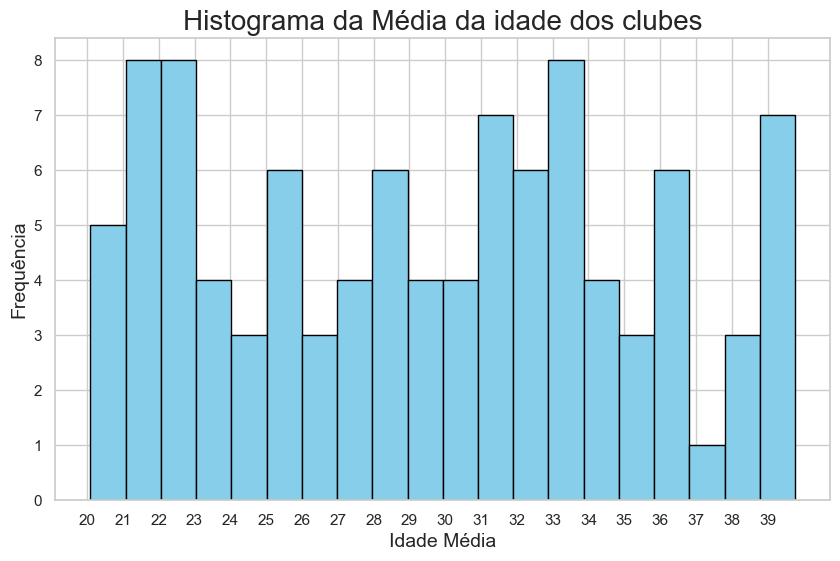

In [376]:

np.random.seed(0)
idade_media = np.random.uniform(low=20, high=40, size=100)

plt.figure(figsize = (10,6))
plt.hist(idade_media, bins=20, color='skyblue', edgecolor='black')

plt.xticks(np.arange(int(np.min(idade_media)), int(np.max(idade_media)) + 1, 1))

plt.xlabel('Idade Média', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.title('Histograma da Média da idade dos clubes', fontsize = 20)
plt.show()


## *Separando valores da mesma coluna* ##

In [377]:
df[['GolsMarcados', 'GolsSofridos']] = df['GolsF/S'].str.split(':', expand=True).astype(int)


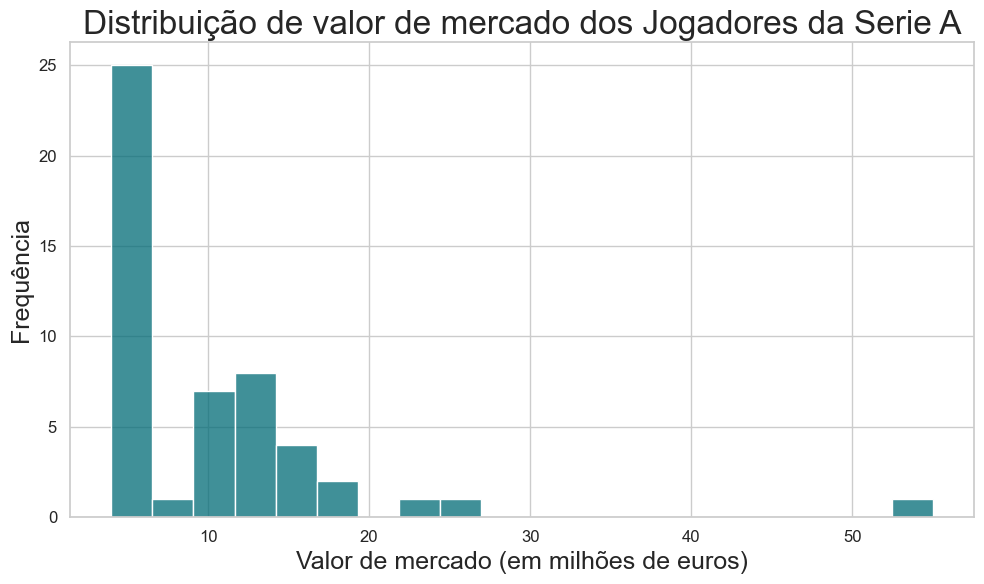

In [378]:
plt.figure(figsize=(10, 6))
sns.histplot(df_jogador["Valor de mercado"],color = '#006b76', bins = 20)
plt.title('Distribuição de valor de mercado dos Jogadores da Serie A', size=24)  
plt.xlabel('Valor de mercado (em milhões de euros)', size=18)
plt.ylabel('Frequência', size=18)

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


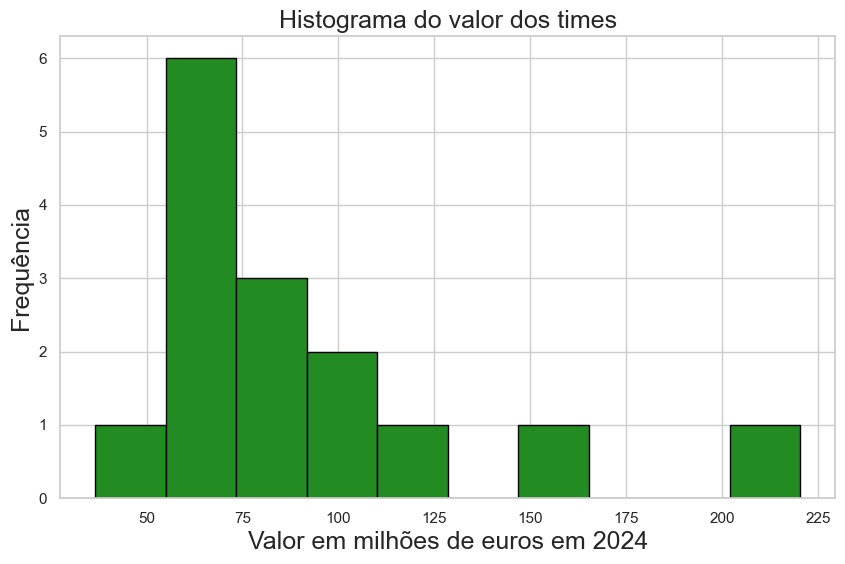

In [379]:
# Criar histograma para o valor dos times
plt.figure(figsize=(10,6))
plt.hist(df_valor_time['Valor_2024'], bins=10, color='forestgreen', edgecolor='black')
plt.xlabel('Valor em milhões de euros em 2024', fontsize = 18)
plt.ylabel('Frequência', fontsize = 18)
plt.title('Histograma do valor dos times', fontsize = 18)
plt.show()


## *Gráficos de correlação* ##

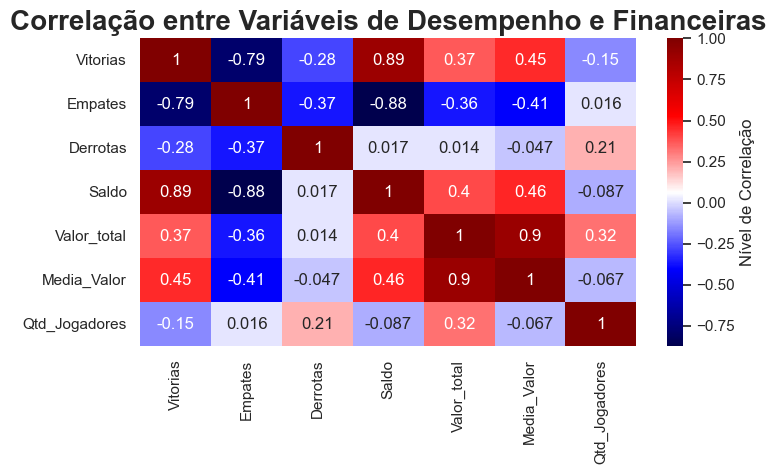

In [380]:

colunas_selecionadas = ['Vitorias', 'Empates', 'Derrotas', 'Saldo', 'Valor_total', 'Media_Valor', 'Qtd_Jogadores']
df_selecionado = df[colunas_selecionadas]

# Criando o mapa de calor da correlação das colunas selecionadas
plt.figure(figsize=(8, 4))
sns.heatmap(df_selecionado.corr(), annot=True, cmap="seismic", cbar_kws={'label': 'Nível de Correlação'})

# Adicionando título com ajustes de fonte
plt.title("Correlação entre Variáveis de Desempenho e Financeiras", fontsize=20, fontweight='bold')

plt.show()


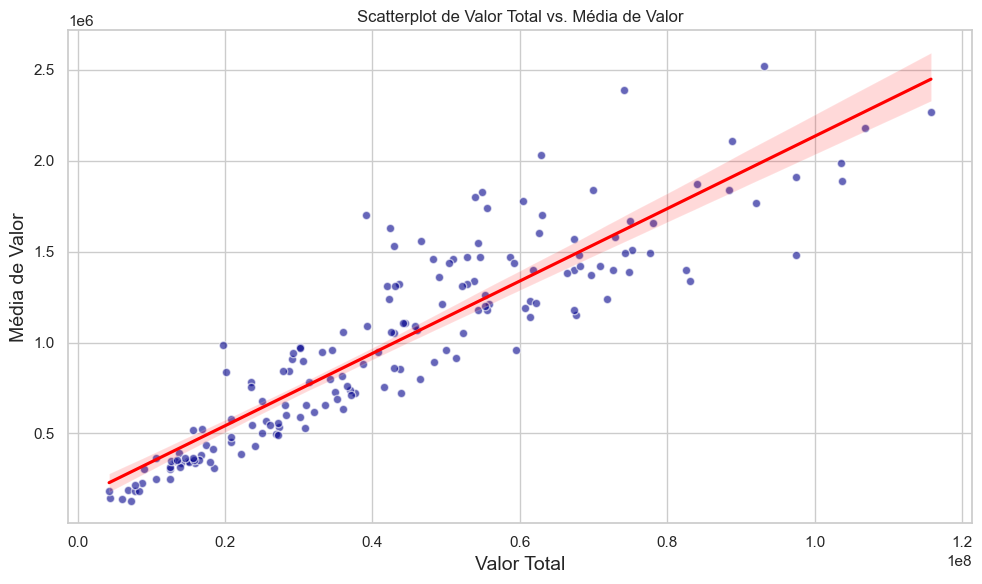

In [381]:
# Criar scatterplot para Valor_total vs. Media_Valor
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.scatter(df['Valor_total'], df['Media_Valor'], 
            alpha = 0.6, edgecolor = "w", color = "darkblue")

sns.regplot(x = df['Valor_total'], y = df['Media_Valor'], scatter = False, label ="Linha de regressão", color = "red")

plt.title('Scatterplot de Valor Total vs. Média de Valor')
plt.xlabel('Valor Total', fontsize = 14)
plt.ylabel('Média de Valor',  fontsize = 14)
plt.grid(True)
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

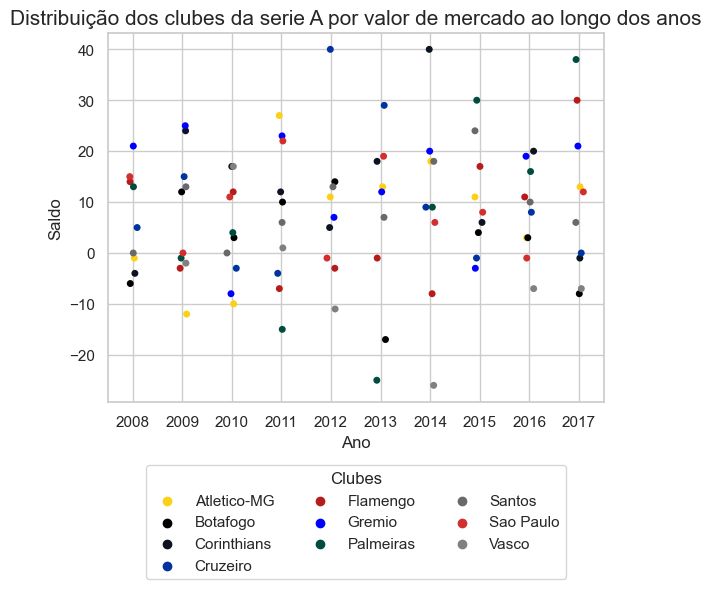

<Figure size 1000x600 with 0 Axes>

In [382]:
sns.stripplot(x = 'Ano', y = 'Saldo', data = df_filtrado, hue = 'Clubes', palette = team_colors)
plt.title("Distribuição dos clubes da serie A por valor de mercado ao longo dos anos", size =15)
plt.legend(title='Clubes', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid('darkgrid')
plt.figure(figsize = (10,6))

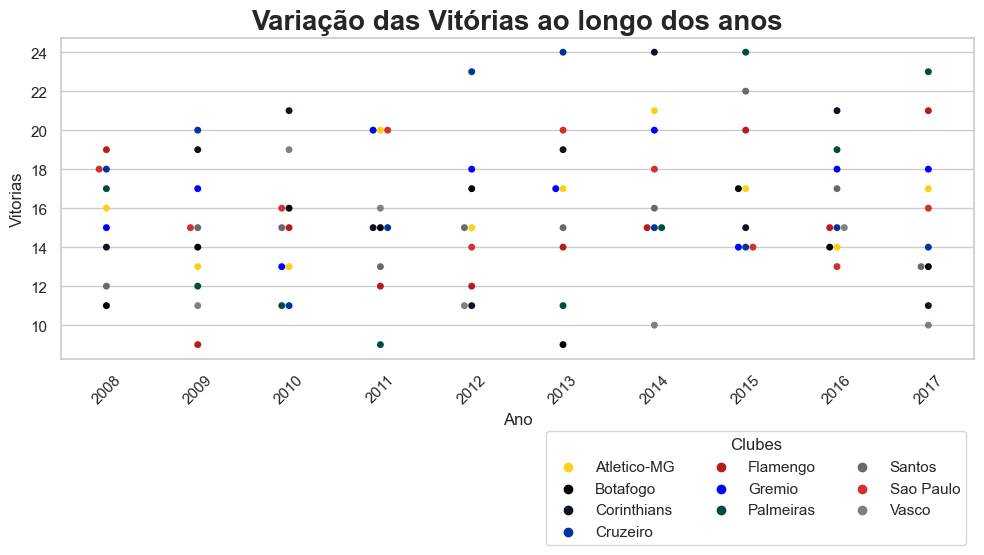

In [383]:
plt.figure(figsize=(10, 6))

ax = sns.swarmplot(data=df_filtrado, x="Ano", y="Vitorias", hue="Clubes", palette=team_colors)
plt.title("Variação das Vitórias ao longo dos anos", fontweight = 'bold',fontsize = 20)
plt.legend(title='Clubes', loc='upper right', bbox_to_anchor=(1, -0.2), ncol=3)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


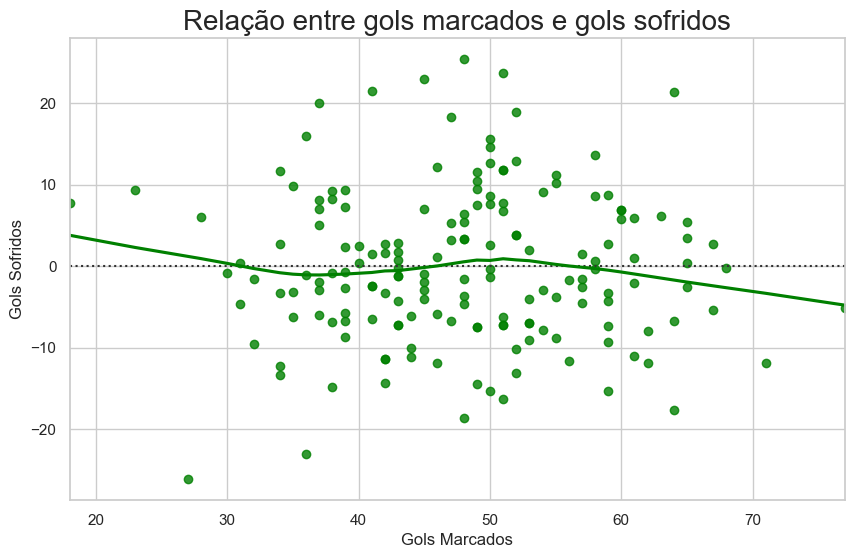

In [384]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.residplot(data=df, x='GolsMarcados', y='GolsSofridos', lowess=True, color = 'green')

plt.title("Relação entre gols marcados e gols sofridos", fontsize=20)
plt.xlabel("Gols Marcados")
plt.ylabel("Gols Sofridos")

plt.show()


c:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

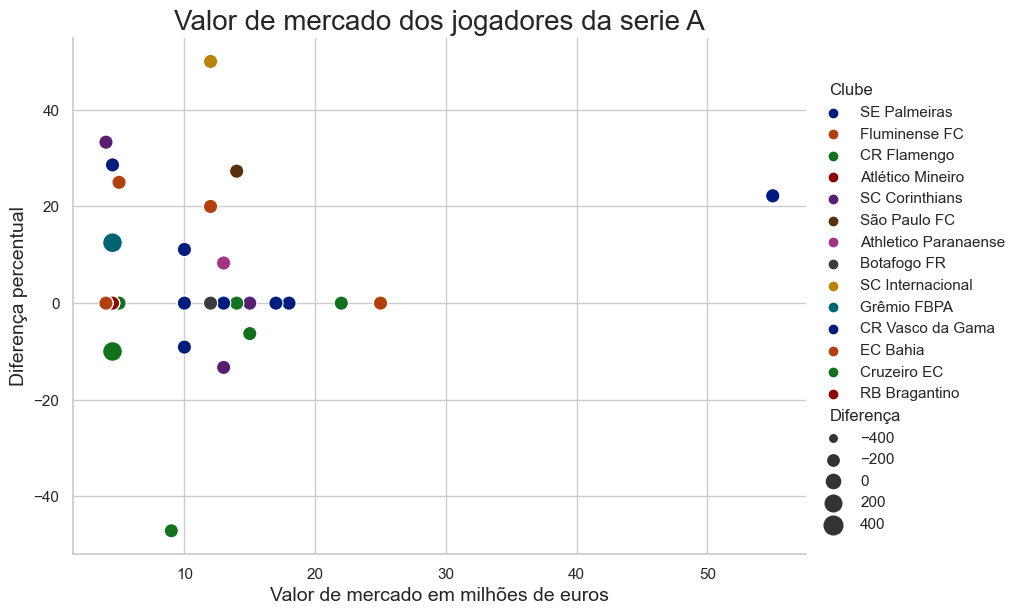

In [385]:

plt.figure(figsize=(10,6))
g = sns.relplot(
    data=df_jogador,
    x="Valor de mercado", y="%",
    hue="Clube", size="Diferença",
    palette='dark', sizes=(10, 200),
    height=6, aspect=1.4
)


plt.title("Valor de mercado dos jogadores da serie A", fontsize = 20)
plt.xlabel("Valor de mercado em milhões de euros", fontsize = 14)
plt.ylabel("Diferença percentual", fontsize = 14)
plt.grid(True)
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_12284\168350412.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

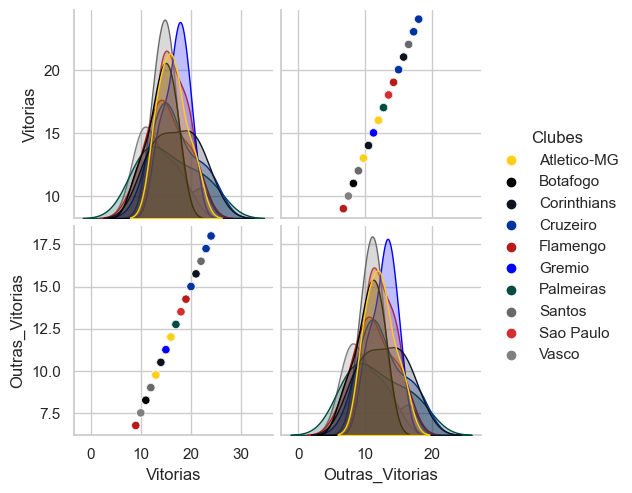

In [386]:
plt.figure(figsize = (15,7))

df_filtrado['Outras_Vitorias'] = df_filtrado['Vitorias'] * 0.75  

sns.pairplot(df_filtrado[['Vitorias', 'Outras_Vitorias', 'Clubes']], hue='Clubes', palette = team_colors)


plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_12284\187922540.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

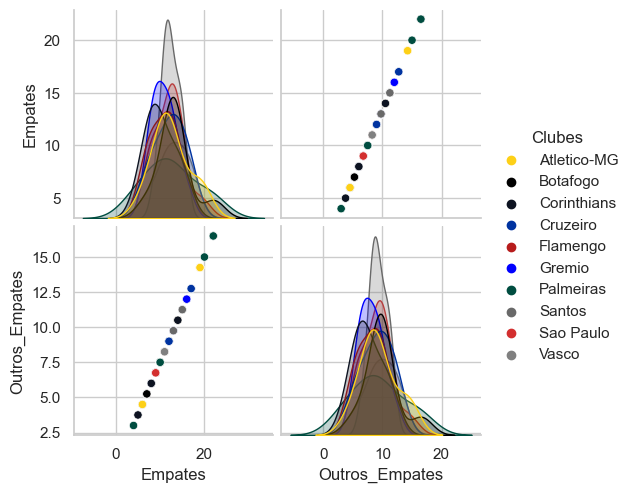

In [387]:
plt.figure(figsize = (15,7))

df_filtrado['Outros_Empates'] = df_filtrado['Empates'] * 0.75  

sns.pairplot(df_filtrado[['Empates', 'Outros_Empates', 'Clubes']], hue='Clubes', palette = team_colors)


plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_12284\2432561676.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

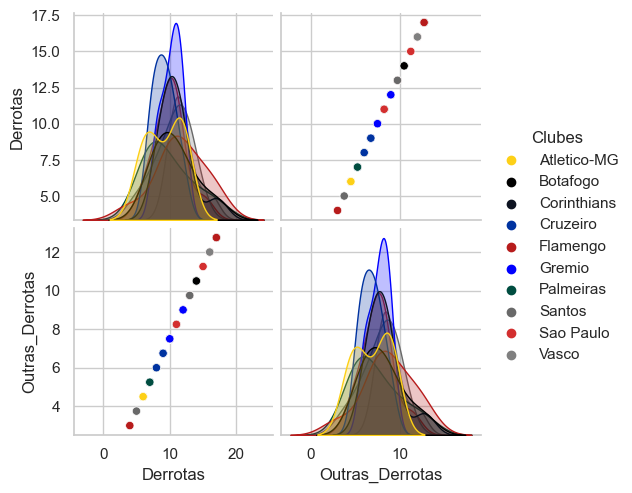

In [388]:
plt.figure(figsize = (15,7))
df_filtrado['Outras_Derrotas'] = df_filtrado['Derrotas'] * 0.75  

sns.pairplot(df_filtrado[['Derrotas', 'Outras_Derrotas', 'Clubes']], hue='Clubes', palette = team_colors)


plt.show()


c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



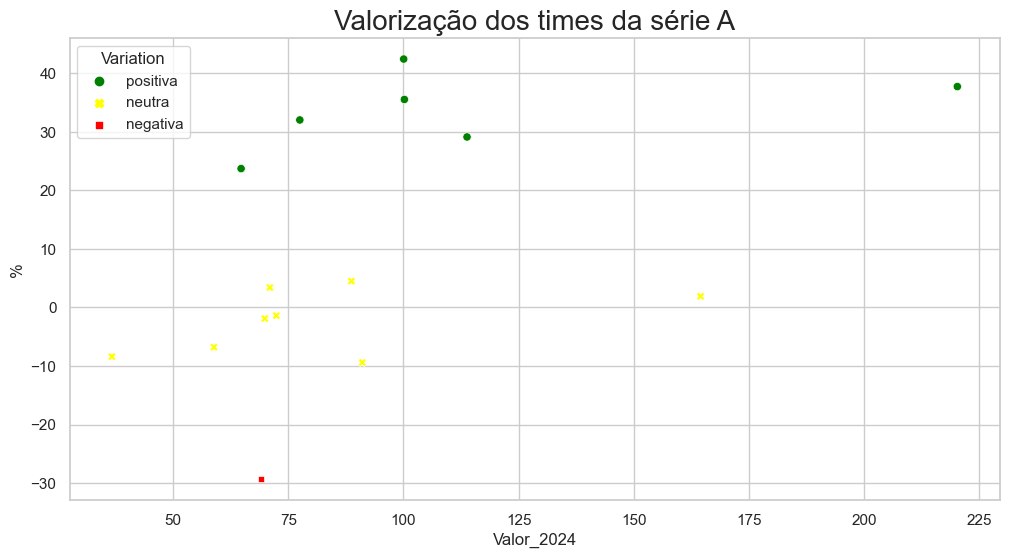

In [389]:
from sklearn.cluster import KMeans

df_group = df_valor_time[['Valor_2024', '%']].copy()

def classify_variation(x):
    if -10 <= x <= 10:
        return 'neutra'
    elif x < 0:
        return 'negativa'
    else:
        return 'positiva'

df_group['Variation'] = df_group['%'].apply(classify_variation)

# Aplica KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_group['cluster'] = kmeans.fit_predict(df_group[['Valor_2024', '%']])

# Mapeamento de cores baseado na coluna 'Variation'
palette_colors = {
    'positiva': 'green',
    'negativa': 'red',
    'neutra': 'yellow'
}

# Plotando
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_group, x="Valor_2024", y="%", hue='Variation', style='Variation', palette=palette_colors)
plt.title("Valorização dos times da série A", fontsize = 20)
plt.show()


# *Gráfico de sino* #

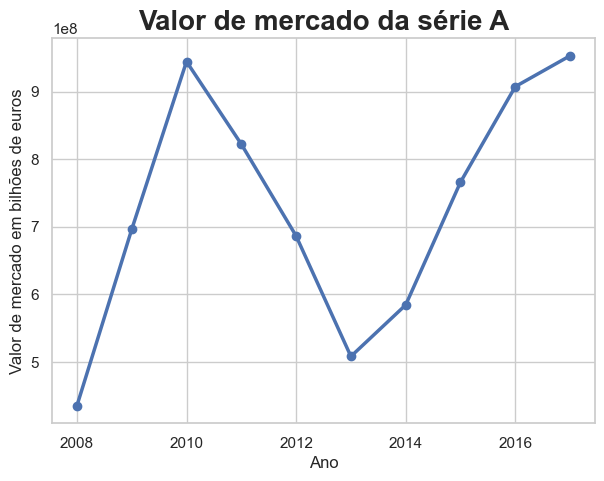

In [390]:
plt.figure(figsize=(7,5))
agrupamento_df = df.groupby('Ano')['Valor_total'].sum().reset_index()

plt.plot(agrupamento_df['Ano'], agrupamento_df['Valor_total'], marker = 'o', linewidth=2.5)
plt.title("Valor de mercado da série A", fontsize=20, 
          fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Valor de mercado em bilhões de euros')
plt.grid(True, which='both')

plt.savefig('mercado_serie_a.png', dpi=300)  
plt.show()


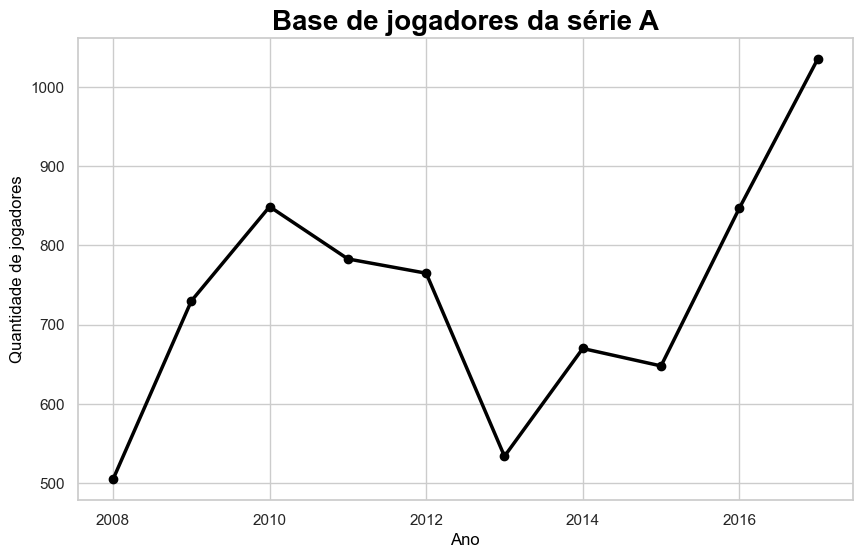

In [391]:
plt.figure(figsize=(10,6))

agrupamento_df = df.groupby('Ano')['Qtd_Jogadores'].sum().reset_index()

plt.plot(agrupamento_df['Ano'], agrupamento_df['Qtd_Jogadores'],
          color = 'black', marker = 'o', linewidth=2.5)
plt.title("Base de jogadores da série A", fontsize=20, fontweight='bold', color='black')
plt.xlabel('Ano', color = 'black')
plt.ylabel('Quantidade de jogadores', color = 'black')
plt.grid(True, which='both')

plt.savefig('mercado_serie_a.png', dpi=300)  # Salva em alta resolução
plt.show()


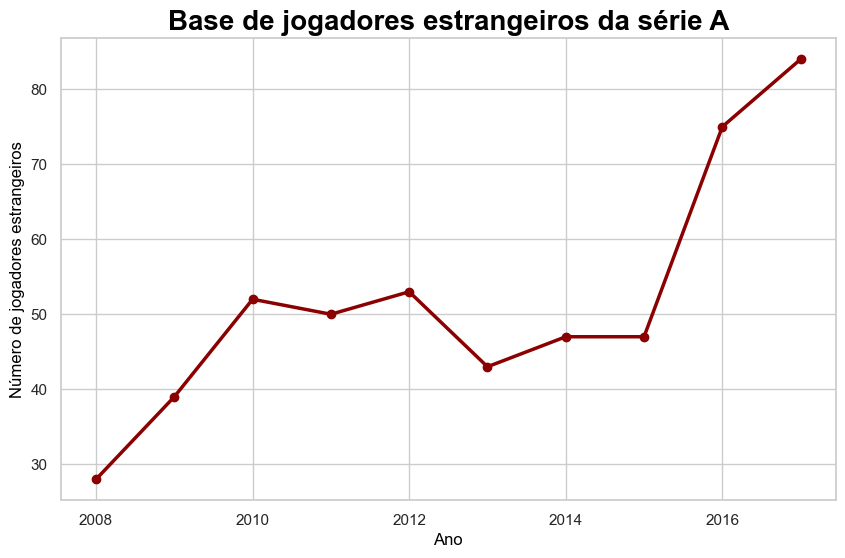

In [392]:
plt.figure(figsize=(10,6))

agrupamento_df = df.groupby('Ano')['Estrangeiros'].sum().reset_index()

plt.plot(agrupamento_df['Ano'], agrupamento_df['Estrangeiros'], 
         color = 'darkred', marker = 'o', linewidth=2.5)
plt.title("Base de jogadores estrangeiros da série A", fontsize=20, fontweight='bold', color='black')
plt.xlabel('Ano', color = 'black')
plt.ylabel('Número de jogadores estrangeiros', color = 'black')
plt.grid(True, which='both')

plt.savefig('mercado_serie_a.png', dpi=300)  # Salva em alta resolução
plt.show()


# *Gráfico de distribuição e variância* #

Text(0.5, 1.0, 'Gráfico de distrinuição e variância do saldo ao valor total')

<Figure size 1200x600 with 0 Axes>

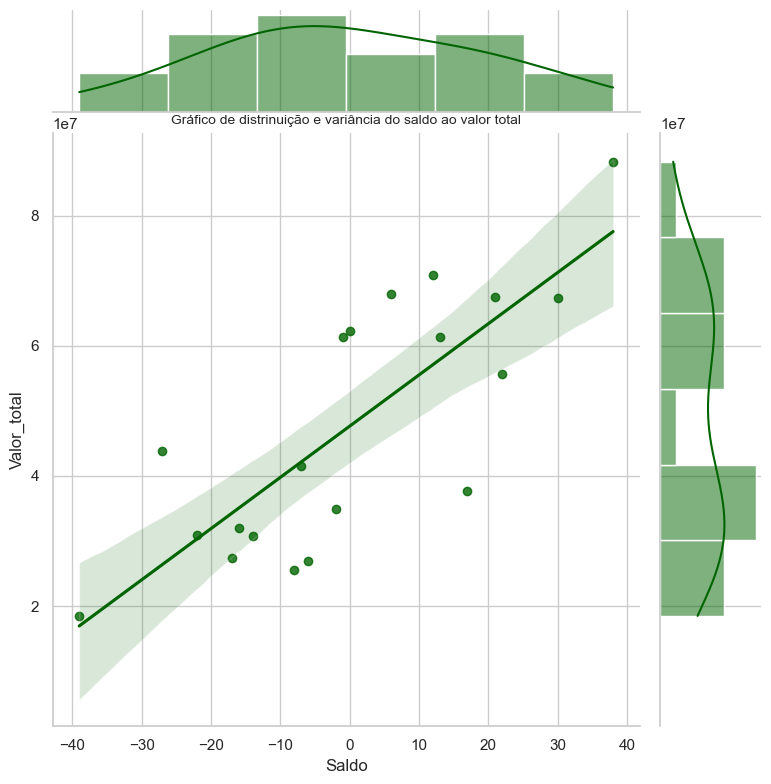

In [393]:
df_2017 = df[df['Ano'] == 2017]
plt.figure(figsize=(12,6))
sns.jointplot(x ='Saldo', y = 'Valor_total', data = df_2017, kind = 'reg', color = 'darkgreen', height=8)
plt.title("Gráfico de distrinuição e variância do saldo ao valor total", fontsize = 10)

# *Gráfico de Barra* #

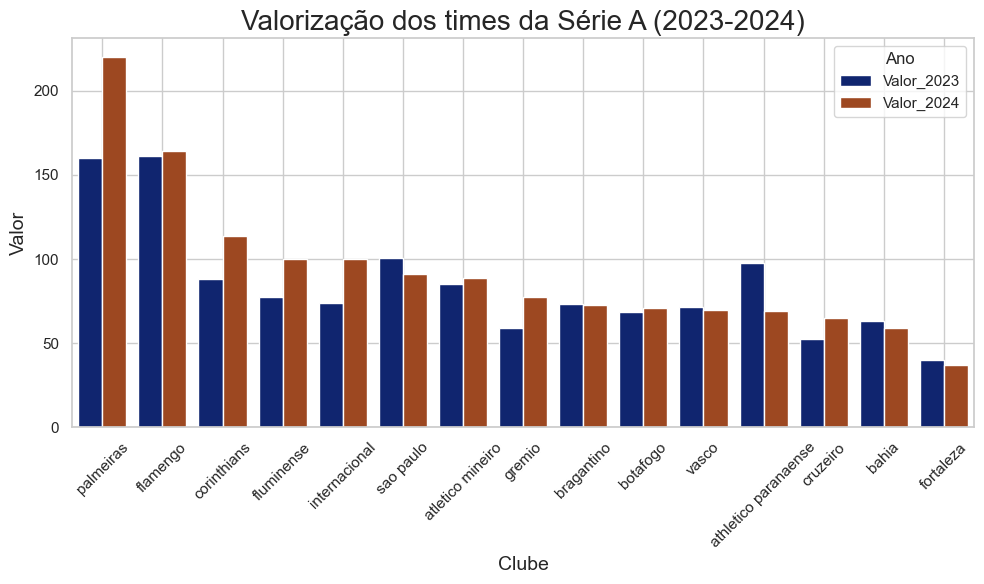

In [394]:
plt.figure(figsize=(10, 6))

data_to_plot = df_valor_time.melt(id_vars=['Clube'],
             value_vars=['Valor_2023', 'Valor_2024'], var_name='Ano', value_name='Valor')

# Plotando o gráfico de barras
sns.barplot(data=data_to_plot, x='Clube', y='Valor', hue='Ano', palette='dark')

# Adicionando título e rótulos dos eixos
plt.title("Valorização dos times da Série A (2023-2024)", fontsize=20)
plt.xlabel("Clube", fontsize=14)
plt.ylabel("Valor", fontsize=14)

# Exibindo o gráfico
plt.legend(title='Ano', loc='upper right')
plt.xticks(rotation=45)  
plt.grid('darkgrid')
plt.tight_layout()
plt.show()


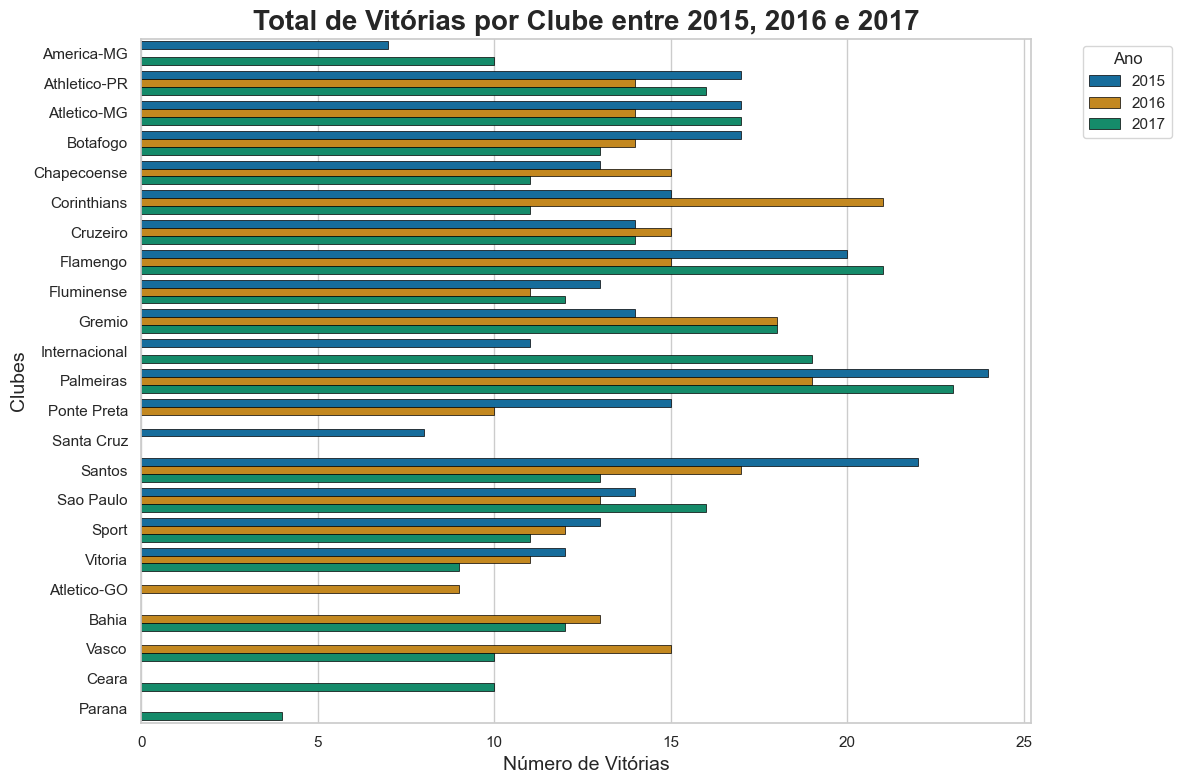

In [395]:
df_anos_selecionados = df[df['Ano'].isin([2015, 2016, 2017])]

vitorias_por_clube_ano = df_anos_selecionados.groupby(['Ano', 'Clubes'])['Vitorias'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=vitorias_por_clube_ano, x='Vitorias', y='Clubes', hue='Ano', palette='colorblind', 
            edgecolor='black', linewidth=0.5)
plt.title('Total de Vitórias por Clube entre 2015, 2016 e 2017', fontsize = 20, fontweight = 'bold')
plt.xlabel('Número de Vitórias', fontsize = 14)
plt.ylabel('Clubes', fontsize = 14)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


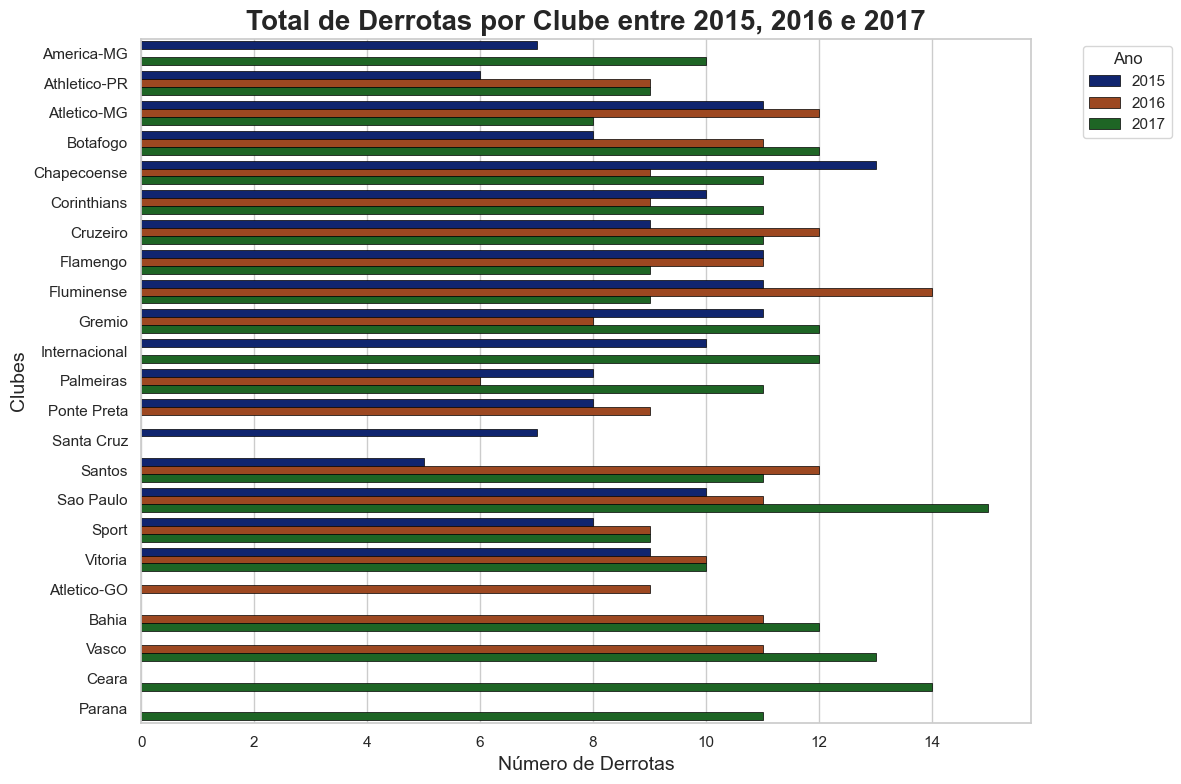

In [396]:
df_anos_selecionados = df[df['Ano'].isin([2015, 2016, 2017])]

# Agrupando os dados por ano e clube e somando as vitórias
vitorias_por_clube_ano = df_anos_selecionados.groupby(['Ano', 'Clubes'])['Derrotas'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=vitorias_por_clube_ano, x='Derrotas', y='Clubes', hue='Ano', palette='dark', edgecolor='black', linewidth=0.5)
plt.title('Total de Derrotas por Clube entre 2015, 2016 e 2017', fontsize = 20, fontweight = 'bold')
plt.xlabel('Número de Derrotas', fontsize = 14)
plt.ylabel('Clubes', fontsize = 14)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


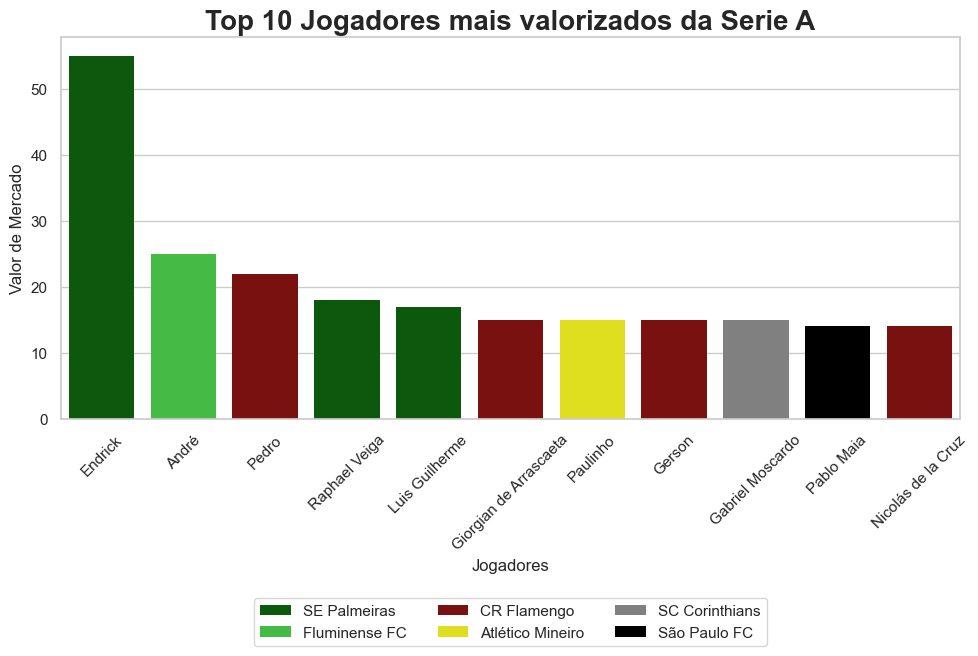

In [397]:
cores_clubes = {'SE Palmeiras': 'darkgreen', 'Fluminense FC': 'limegreen',
                'CR Flamengo': 'darkred', 'Atlético Mineiro': 'yellow',
                'SC Corinthians': 'grey', 'São Paulo FC': 'black'}

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

df_jogador_filtrado = df_jogador[df_jogador['Valor de mercado'] > 13.8]

sns.barplot(data=df_jogador_filtrado, x='Jogadores', y='Valor de mercado',
 hue='Clube', palette=cores_clubes, dodge=False, linewidth=0)


plt.xlabel('Jogadores')
plt.ylabel('Valor de Mercado')
plt.title('Top 10 Jogadores mais valorizados da Serie A', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, -0.45), loc='upper center', ncol=3)
plt.show()


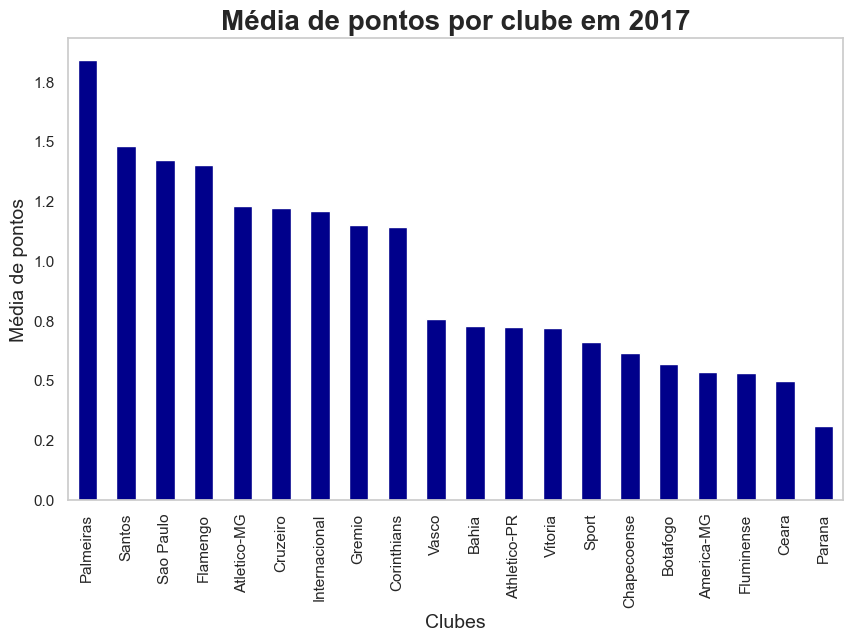

In [398]:
pontos_por_clube = df_ano.groupby('Clubes')['Media_Valor'].mean().sort_values(ascending=False)

# Exibir as medidas de centralidade e dispersão
plt.figure(figsize=(10,6))
pontos_por_clube.plot(kind='bar', color='Darkblue', label='Média por time')

plt.title('Média de pontos por clube em 2017', fontsize=20, fontweight='bold')
plt.xlabel('Clubes', fontsize=14)
plt.ylabel('Média de pontos', fontsize=14)

# Definir o formato dos rótulos do eixo y para mostrar os valores sem a escala em milhões
def formatar_milhoes(x, pos):
    return f'{x/1e6:.1f}'

formatter = FuncFormatter(formatar_milhoes)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(False)
plt.show()


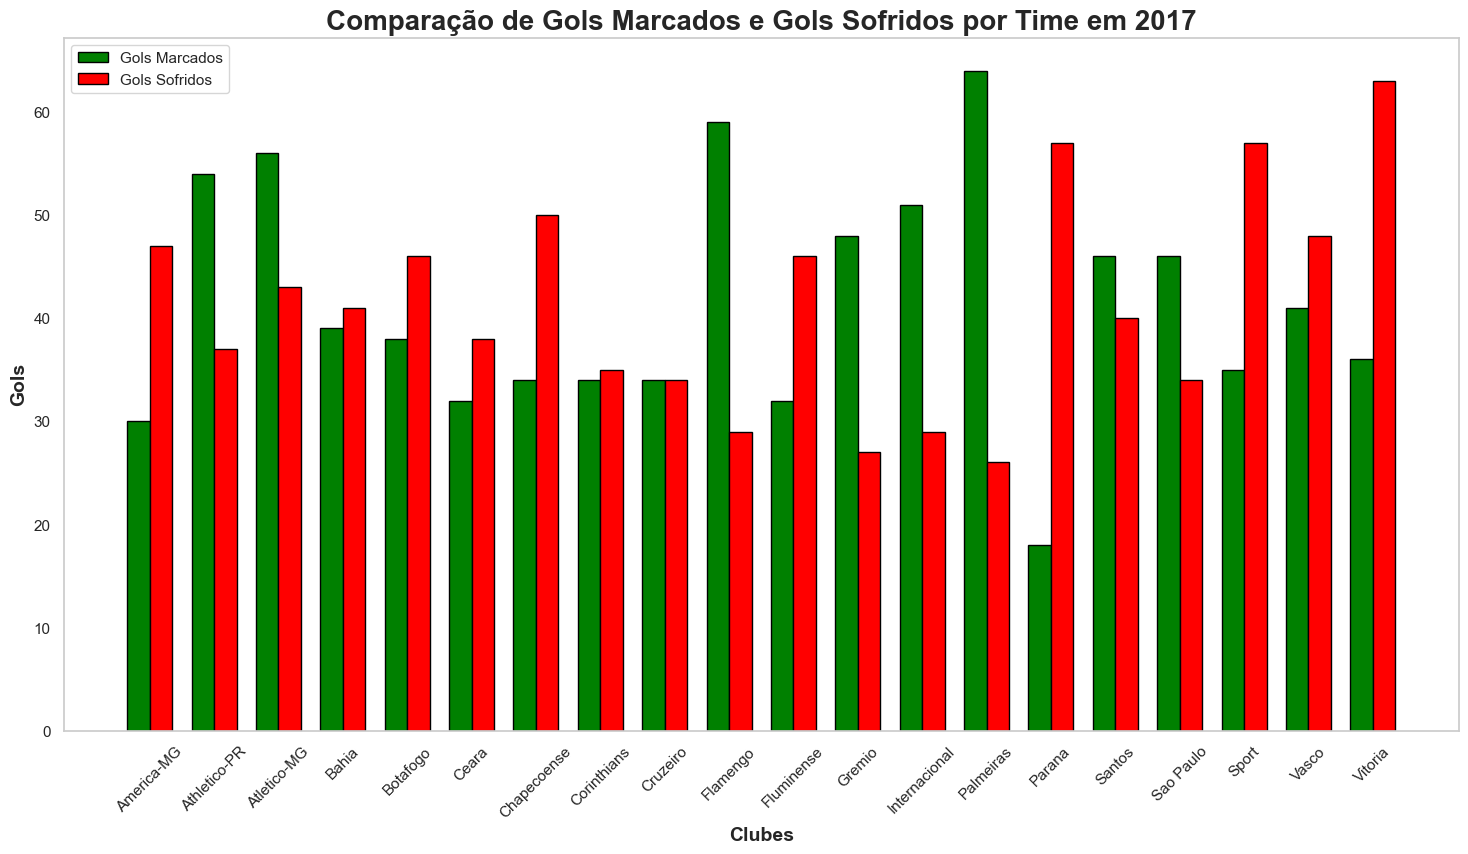

In [399]:
df_2017 = df[df['Ano'] == 2017]

barWidth = 0.35

r1 = range(len(df_2017))  

plt.figure(figsize=(18, 9))
plt.bar(r1, df_2017['GolsMarcados'], color='green', width=barWidth, edgecolor='black', label='Gols Marcados')
plt.bar([x + barWidth for x in r1], df_2017['GolsSofridos'], color='red', width=barWidth, edgecolor='black', label='Gols Sofridos')

plt.xlabel('Clubes', fontweight='bold', fontsize=14)
plt.ylabel('Gols', fontweight='bold', fontsize=14)
plt.title('Comparação de Gols Marcados e Gols Sofridos por Time em 2017', fontweight='bold', fontsize=20)
plt.xticks([r + barWidth/2 for r in r1], df_2017['Clubes'], rotation = 45) 
plt.xlabel("Clubes", fontsize = 14)
plt.ylabel("Gols", fontsize = 14)
plt.legend()
plt.grid(False)

plt.show()


# *Gráfico de caixa* #

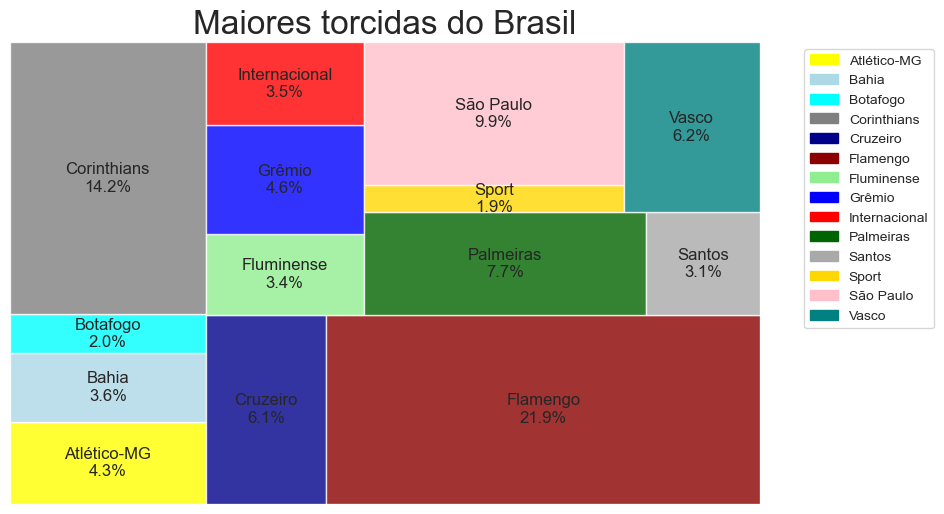

In [400]:
import squarify

maiores_torcidas = df_torcida.groupby('Clube').sum()

cores_clubes = {
    'Flamengo': 'darkred',
    'Corinthians': 'grey',
    'São Paulo': 'pink',
    'Palmeiras': 'darkgreen',
    'Vasco': 'teal',
    'Cruzeiro': 'darkblue',
    'Grêmio': 'blue',  
    'Atlético-MG': 'yellow',
    'Bahia': 'lightblue',
    'Internacional': 'red',  
    'Fluminense': 'lightgreen',
    'Santos': 'darkgrey',
    'Botafogo': 'cyan',  
    'Sport': 'gold'
}

cores = [cores_clubes[clube] for clube in maiores_torcidas.index]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=maiores_torcidas['Percentual (%)'], label=[f'{index}\n{value:.1f}%' for index, value in zip(maiores_torcidas.index, maiores_torcidas['Percentual (%)'])], color=cores, alpha=0.8)
plt.title('Maiores torcidas do Brasil', size=24)
plt.axis('off')

handles = [plt.Rectangle((0,0),1,1, color=cores_clubes[clube]) for clube in maiores_torcidas.index]
plt.legend(handles, maiores_torcidas.index, loc="upper left", fontsize='small', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(left=0.1, right=0.85)  
plt.show()


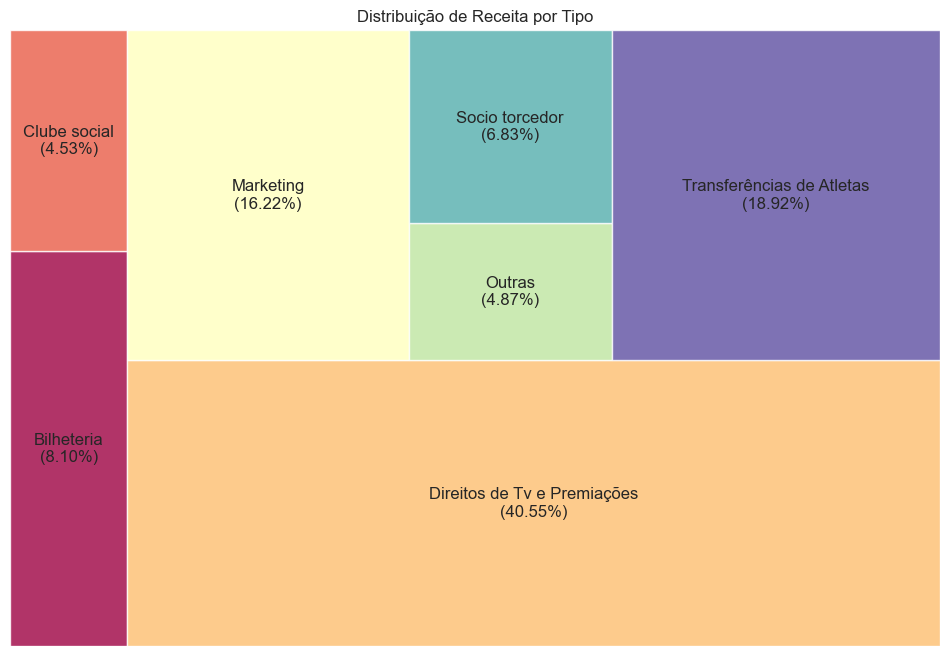

In [401]:
import numpy as np
dados_agrupados = df_receita.groupby('tipo')[' receita'].sum().reset_index()

# Calculando o total de receitas
total_receitas = dados_agrupados[' receita'].sum()

# Valores para o tamanho de cada retângulo
sizes = dados_agrupados[' receita'].values
labels = dados_agrupados['tipo'].apply(lambda x: str(x)).values
percentages = [f"{(value/total_receitas)*100:.2f}%" for value in sizes]
new_labels = [f"{label}\n({percent})" for label, percent in zip(labels, percentages)]

# Cores - gerando uma paleta de cores
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Criando o TreeMap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=new_labels, color=colors, alpha=0.8)

# Título do gráfico
plt.title('Distribuição de Receita por Tipo')
plt.axis('off')  # Desliga os eixos

plt.show()


# *Gráfico de dispersão com centroides* #

c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



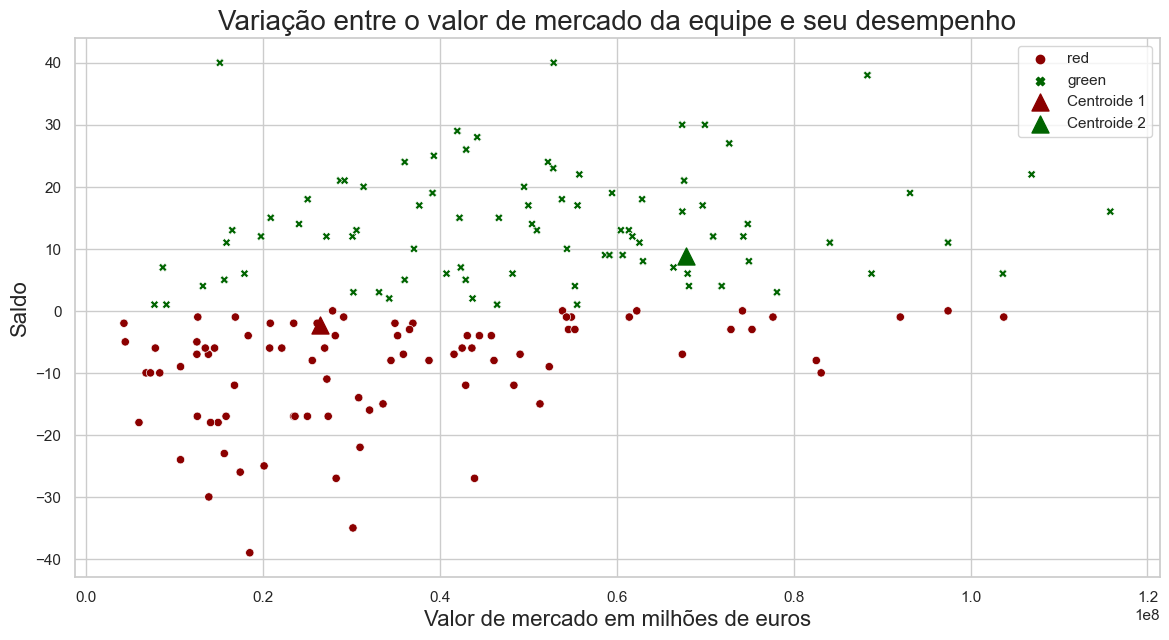

In [402]:

from sklearn.cluster import KMeans



df_group = df[['Valor_total', 'Saldo']].copy()

def classify_variation(lista):
    if lista['Valor_total'] > 0 and lista['Saldo'] > 0:
        return 'green'
    else:
        return 'red'

    
df_group['Variation'] = df_group.apply(classify_variation, axis=1)

# Alterando para 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
df_group['cluster'] = kmeans.fit_predict(df_group[['Valor_total', 'Saldo']])

centroids = kmeans.cluster_centers_

palette_colors = {
    'blue': 'darkblue',
    'green': 'darkgreen',
    'red': 'darkred',
}

centroid_colors = ['darkred', 'darkgreen']  

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_group, x="Valor_total", y="Saldo", hue='Variation', style='Variation', palette=palette_colors)

for i, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=centroid_colors[i], marker='^', s=150, label=f'Centroide {i+1}')

plt.title('Variação entre o valor de mercado da equipe e seu desempenho', fontsize=20)
plt.xlabel('Valor de mercado em milhões de euros', fontsize=16)
plt.ylabel('Saldo', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
